In [1]:
#Clear all variables
%reset -f

In [2]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
# If you are using Jupyter Notebook please first navigate to the file directory and open the Jupyter through the Anaconda Prompt.
# For example if the Python_Code is located in the D:\Experiments\Github_library
#1) Open Anaconda Prompt and type:  
#cd /d D:\Experiments\Github_library\Python_Code
#2) Open the Jupyter Notebook by writing:
#jupyter notebook
current_directory = os.getcwd()
print("Current directory:", current_directory)

# Remove the last folder from the current directory
parent_directory = os.path.dirname(current_directory)

#NetCDf file direcotry 
subfolder = "data_NETCDF"
datapath_file=os.path.join(parent_directory,subfolder)
print("Path of data files:", datapath_file)

Current directory: d:\Experiments\Github_library\Python_Code
Path of data files: d:\Experiments\Github_library\data_NETCDF


In [4]:
# Get a list of all nc4 files in the directory
netcdf_files = glob.glob(os.path.join(datapath_file, '*.nc4'))

# Sort netcdf_files based on the observation numbers
files_number = [int(os.path.basename(file).split('_')[0][1:]) for file in netcdf_files]
sortedlist = [os.path.basename(file) for _, file in sorted(zip(files_number, netcdf_files))]

# General information
print(f"There are {len(sortedlist)} total measurements with the following names:")

There are 2078 total measurements with the following names:


In [5]:
from tabulate import tabulate #please install tabulate package 

# Count the measurements for each polymer and background
polymer_counts = {}
background_names = {'C': 'Clear', 'T': 'Turbid', 'F': 'Foamy'}

# Polymer types categorization
for polymer in ['PET', 'HDPE', 'LDPE', 'PP', 'EPSF', 'Mix', 'Weathered']:
    polymer_files = [x for x in sortedlist if polymer in x]
    polymer_counts[polymer] = len(polymer_files)
    print(f"There are {len(polymer_files)} measurements for {polymer}.")

# Background types categorization
background_counts = {}
for background in ['C', 'T', 'F']:
    background_files = [x for x in sortedlist if background == x.split('_')[2][0]]
    background_counts[background] = len(background_files)
    print(f"There are {len(background_files)} measurements for {background_names[background]} water.")
    
# Combination of polymer and background types
table_data = []
for polymer in ['PET', 'HDPE', 'LDPE', 'PP', 'EPSF', 'Mix', 'Weathered']:
    row_data = []
    for background in ['C', 'T', 'F']:
        combo_files = [x for x in sortedlist if polymer in x and background == x.split('_')[2][0]]
        combo_count = len(combo_files)
        row_data.append(combo_count)
    row_data.append(polymer_counts[polymer])  # Append the sum to the row_data
    table_data.append([polymer] + row_data)
    
# Add a separator line
table_data.append(["-----"] * (len(['Polymer'] + [background_counts[background] for background in ['C', 'T', 'F']] + ['Sum'])))

# Add a row for the summation of each background
background_sum_row = ['Sum'] + [background_counts[background] for background in ['C', 'T', 'F']] + [sum(background_counts.values())]
table_data.append(background_sum_row)

# Display the counts in a table format
headers = ['Polymer'] + [background_names[background] for background in ['C', 'T', 'F']] + ['Sum']
#table_data.append(lastsum)
table = tabulate(table_data, headers, tablefmt='pretty')
print(table)

There are 192 measurements for PET.
There are 145 measurements for HDPE.
There are 152 measurements for LDPE.
There are 234 measurements for PP.
There are 92 measurements for EPSF.
There are 1008 measurements for Mix.
There are 255 measurements for Weathered.
There are 638 measurements for Clear water.
There are 963 measurements for Turbid water.
There are 477 measurements for Foamy water.
+-----------+-------+--------+-------+-------+
|  Polymer  | Clear | Turbid | Foamy |  Sum  |
+-----------+-------+--------+-------+-------+
|    PET    |  54   |  119   |  19   |  192  |
|   HDPE    |  30   |   89   |  26   |  145  |
|   LDPE    |  18   |   82   |  52   |  152  |
|    PP     |  52   |  114   |  68   |  234  |
|   EPSF    |  16   |   68   |   8   |  92   |
|    Mix    |  445  |  332   |  231  | 1008  |
| Weathered |  23   |  159   |  73   |  255  |
|   -----   | ----- | -----  | ----- | ----- |
|    Sum    |  638  |  963   |  477  | 2078  |
+-----------+-------+--------+-------+-----

In [6]:
#Enter a number of displaying a spectrum
n = int(input(f"Enter a number 1 to {len(sortedlist)}"))

In [7]:
#opening a netcdf file
import netCDF4
Target_netcdffile=os.path.join(datapath_file,sortedlist[n-1])

nc_file = netCDF4.Dataset(Target_netcdffile)

# Get global attributes
global_attributes = nc_file.ncattrs()
print(f"Attributes for {sortedlist[n-1]} \n ----------------------------------")
for attr_name in global_attributes:
    print(f"{attr_name}: {getattr(nc_file, attr_name)}")

Polymer=getattr(nc_file, 'Debris Polymer')
Background=getattr(nc_file, 'Background flow status')
Plasticfraction=getattr(nc_file, 'Plastic fraction(%)')  

print(f"Variables are {nc_file.variables.keys()}") # get all variable names
reflectance_data = nc_file.variables['Reflectacne']
RgbImage = nc_file.variables['RgbImage']
LableledImage = nc_file.variables['LabeledImage']

Attributes for O50_HDPE_C000_W_17_F5.nc4 
 ----------------------------------
Debris Polymer: HDPE
Debris Color: White
Background flow status: Clear
Plastic fraction(%): 16.4
Sediment concentration [mg.L^-1]: 0.0
Flow discharge [cms]: 0.01
Quality Flag (1:lowest, 5:highest): 5.0
Variables are dict_keys(['Reflectacne', 'RgbImage', 'LabeledImage'])


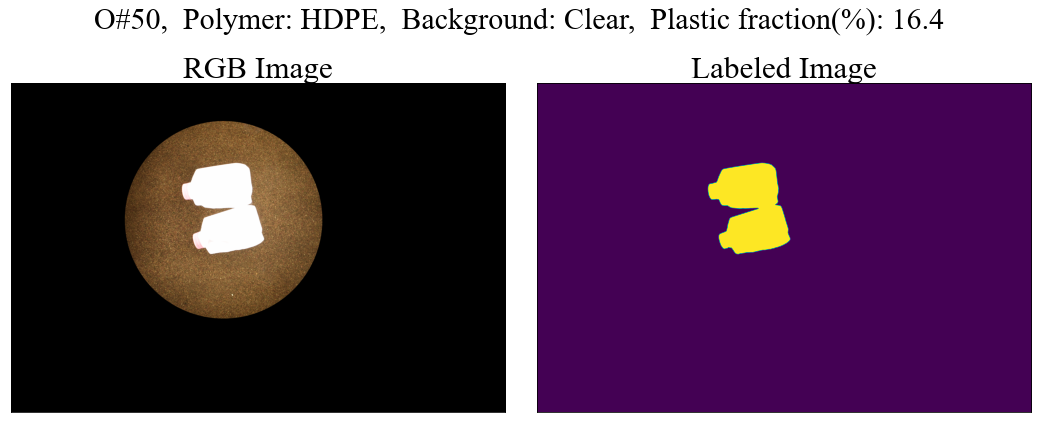

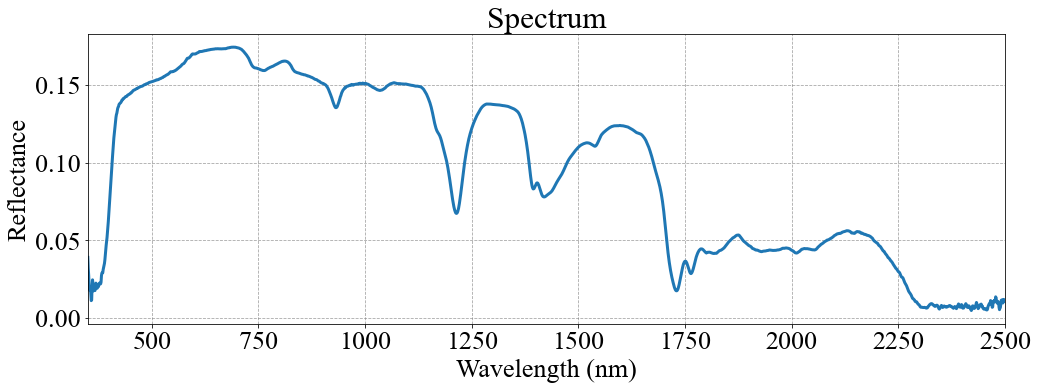

In [8]:
# Create wavelength values (assuming they are stored in the netCDF file)
wavelengths = np.linspace(350, 2500, len(reflectance_data))

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 26 

# Transpose the array to match MATLAB's order
rgb_image_data = np.transpose(RgbImage, (2, 1, 0))

# Transpose the array to match MATLAB's order
label_image_data = np.transpose(LableledImage, (1, 0))

# Create side-by-side subplots on a single figure
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Display the RGB image
axs[0].imshow(rgb_image_data)
axs[0].axes.get_xaxis().set_ticks([])
axs[0].axes.get_yaxis().set_ticks([]) 
axs[0].set_title('RGB Image')

# Display the labeled image
axs[1].imshow(label_image_data)
axs[1].axes.get_xaxis().set_ticks([])
axs[1].axes.get_yaxis().set_ticks([])
foam_title = f'Labeled Image, Foam fraction(%): {getattr(nc_file, "Foam fraction(%)")}' if Background == 'Foamy' else 'Labeled Image'
axs[1].set_title(foam_title)

# Adjust layout for better spacing
fig.tight_layout(rect=[0, 0.3, 1, 0.99])

# Set a single main title for all the subplots
fig.suptitle(f"O#{n},  Polymer: {Polymer},  Background: {Background},  Plastic fraction(%): {Plasticfraction}", fontsize=30)

plt.show()

fig2, ax=plt.subplots(figsize=(15, 6))

# continuous line plot
ax.plot(wavelengths, reflectance_data, linewidth=3.0, label='Reflectance')

# Add labels and title
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.set_title(f"Spectrum")

# Set x and y limits
ax.set_xlim(350, 2500)  # Adjust the limits as needed

# Add major grid lines
ax.grid(True, which='major', linestyle='--', color='gray', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Close the netCDF file
nc_file.close()